<a href="https://colab.research.google.com/github/SrishtiPatil/ANN-V.S.-CNN/blob/main/Alien_VS_Predator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from pathlib import Path

import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
train_path = Path('/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/train')
test_path = Path('/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/test')

In [3]:
list(train_path.glob("*"))

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/train/alien'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/train/predator')]

In [4]:
for dir_path in train_path.glob('*'):
    print(dir_path)
    print(len(list(dir_path.glob('*.jpg'))))

/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/train/alien
347
/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/train/predator
347


In [5]:
for dir_path in test_path.glob('*'):
    print(dir_path)
    print(len(list(dir_path.glob('*.jpg'))))

/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/test/alien
100
/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/test/predator
100


In [6]:
b_s = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=b_s)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=b_s)

Found 694 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)

['alien', 'predator']


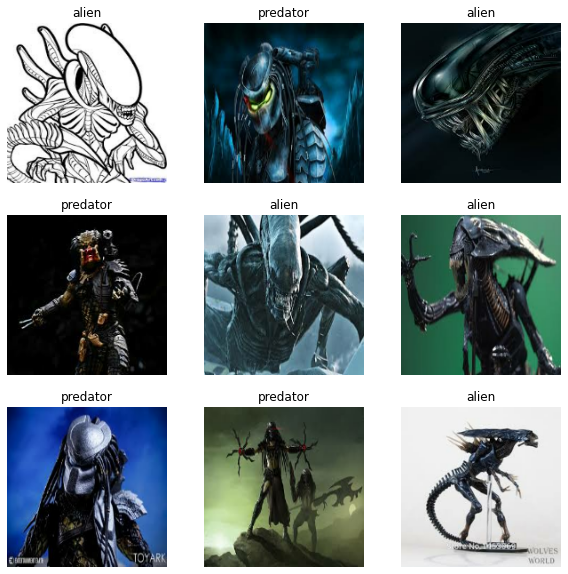

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [11]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=None,
  epochs=epochs
)

Epoch 1/10
22/22 [==============================] - 7s 30ms/step - loss: 0.7132 - accuracy: 0.5122
Epoch 2/10
22/22 [==============================] - 0s 22ms/step - loss: 0.6142 - accuracy: 0.6925
Epoch 3/10
22/22 [==============================] - 0s 22ms/step - loss: 0.5505 - accuracy: 0.7241
Epoch 4/10
22/22 [==============================] - 0s 22ms/step - loss: 0.5113 - accuracy: 0.7585
Epoch 5/10
22/22 [==============================] - 0s 22ms/step - loss: 0.4735 - accuracy: 0.7574
Epoch 6/10
22/22 [==============================] - 0s 22ms/step - loss: 0.4820 - accuracy: 0.8031
Epoch 7/10
22/22 [==============================] - 0s 22ms/step - loss: 0.3976 - accuracy: 0.8185
Epoch 8/10
22/22 [==============================] - 0s 22ms/step - loss: 0.3460 - accuracy: 0.8433
Epoch 9/10
22/22 [==============================] - 0s 22ms/step - loss: 0.3036 - accuracy: 0.8646
Epoch 10/10
22/22 [==============================] - 0s 22ms/step - loss: 0.2752 - accuracy: 0.8907


This image most likely belongs to alien with a 85.51 percent confidence.


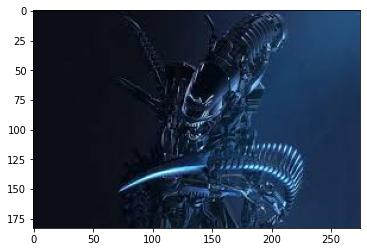

In [14]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/test/alien'

img = tf.keras.preprocessing.image.load_img(
    img_path+'/0.jpg', target_size=(img_height, img_width)
)

image=plt.imread(img_path+'/0.jpg')
plt.imshow(image)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


In [15]:
model_ann = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [16]:
model_ann.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
history = model_ann.fit(
  train_ds,
  validation_data=None,
  epochs=10
)

Epoch 1/10
22/22 [==============================] - 0s 7ms/step - loss: 2195.6012 - accuracy: 0.5134
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 385.5680 - accuracy: 0.6413
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 470.8930 - accuracy: 0.6110
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 160.3807 - accuracy: 0.6828
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 326.5149 - accuracy: 0.6615
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 243.8416 - accuracy: 0.6917
Epoch 7/10
22/22 [==============================] - 0s 7ms/step - loss: 295.1616 - accuracy: 0.6719
Epoch 8/10
22/22 [==============================] - 0s 7ms/step - loss: 116.9859 - accuracy: 0.7697
Epoch 9/10
22/22 [==============================] - 0s 7ms/step - loss: 106.0544 - accuracy: 0.7778
Epoch 10/10
22/22 [==============================] - 0s 7ms/step - loss: 116.7831 - accuracy: 0.758

This image most likely belongs to predator with a 73.11 percent confidence.


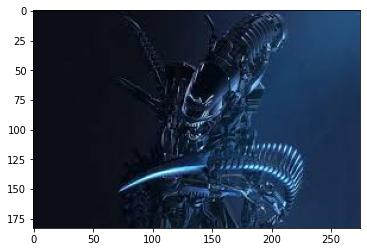

In [18]:
img_path = '/content/drive/MyDrive/Colab Notebooks/Alien vs Predator/test/alien'

img = tf.keras.preprocessing.image.load_img(
    img_path+'/0.jpg', target_size=(img_height, img_width)
)

image=plt.imread(img_path+'/0.jpg')
plt.imshow(image)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_ann.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)